In [21]:
from src.base import Block, Boxtype
import src.vcs_function as eval
import src.box_plotter as bxplot
import time
import pandas as pd

#test Blocks
b1 = Block(boxtype=Boxtype(1,2,4,True,True,True,1), rot='wlh')
b2 = Block(boxtype=Boxtype(1,2,3,True,True,True,1), rot='lwh')
b3 = Block(boxtype=Boxtype(1,1,2,True,True,True,1), rot='hwl')

#test join
print("b1:",b1); print("b2:",b2); print("b3:",b3)
t=b1.join(b2, 'y'); print(t,"b1+b2:",b1)
t=b1.join(b3, 'z'); print(t,"b1+b3:",b1)
t=b1.join(b1, 'x'); print(t,"b1+b1:",b1)

b1: Block: l: 4 w: 2 h: True weight: 1 stacking_weight_resistance: 1000 volume: 8 occupied_volume: 8 items: {<src.base.Boxtype object at 0x132aaa190>: 1} ratio:1.0
b2: Block: l: 2 w: 3 h: True weight: 1 stacking_weight_resistance: 1000 volume: 6 occupied_volume: 6 items: {<src.base.Boxtype object at 0x102ed9340>: 1} ratio:1.0
b3: Block: l: True w: 2 h: 1 weight: 1 stacking_weight_resistance: 1000 volume: 2 occupied_volume: 2 items: {<src.base.Boxtype object at 0x102ed9d90>: 1} ratio:1.0
False b1+b2: Block: l: 4 w: 2 h: True weight: 1 stacking_weight_resistance: 1000 volume: 8 occupied_volume: 8 items: {<src.base.Boxtype object at 0x132aaa190>: 1} ratio:1.0
False b1+b3: Block: l: 4 w: 2 h: True weight: 1 stacking_weight_resistance: 1000 volume: 8 occupied_volume: 8 items: {<src.base.Boxtype object at 0x132aaa190>: 1} ratio:1.0
True b1+b1: Block: l: 8 w: 2 h: True weight: 2 stacking_weight_resistance: 1000 volume: 16 occupied_volume: 16 items: {<src.base.Boxtype object at 0x132aaa190>: 2

## Plot container

In [22]:
def load_instance(filename = "instancia.txt", type="BF", id_instance=5):
    with open(filename, "r") as file:
        #discard first line
        file.readline()
      
        for j in range(100):
            file.readline()
            L, W, H, WEIGHT,SUPPORTED_WEIGHT = [int(x) for x in file.readline().split()]

            #read second line
            n = int(file.readline())
            #read n lines
            items = Itemdict()
            for i in range(n):
                id, l, rotx, w, roty, h, rotz, n, weight, supported_weight = [int(x) for x in file.readline().split()]    
                item = Boxtype(id, l, w, h, rotx, roty, rotz, weight, supported_weight)
                items[item]=n
            
            if j == id_instance: return  items, L, W, H, WEIGHT, SUPPORTED_WEIGHT

In [23]:
def adyacent_blocks(blocks,container,p):
    last = blocks[-1]
    adyacent = list()
    box_dims = []
    
    for block in blocks[:-1]:
        
        if abs(block.xmax - last.xmin) <= (block.xmax - block.xmin) * p and ((block.zmin < last.zmax and block.zmax > last.zmin ) and (block.ymin < last.ymax and block.ymax > last.ymin )):
            z_diff_max = max([block.zmin,last.zmin])
            z_diff_min = min([block.zmax,last.zmax])
            y_diff_max = max([block.ymin,last.ymin])
            y_diff_min = min([block.ymax,last.ymax])
            adyacent.append(block)
            block.covered_surface+= (z_diff_min-z_diff_max) * (y_diff_min-y_diff_max)
            block.covered_surface_face['X1']+= (z_diff_min-z_diff_max) * (y_diff_min-y_diff_max)
            last.covered_surface+= (z_diff_min-z_diff_max) * (y_diff_min-y_diff_max)
            last.covered_surface_face['X2']+= (z_diff_min-z_diff_max) * (y_diff_min-y_diff_max)

        elif abs(block.xmin - last.xmax) <= (block.xmax - block.xmin) * p and ((block.zmin < last.zmax and block.zmax > last.zmin ) and (block.ymin < last.ymax and block.ymax > last.ymin )):
            z_diff_max = max([block.zmin,last.zmin])
            z_diff_min = min([block.zmax,last.zmax])
            y_diff_max = max([block.ymin,last.ymin])
            y_diff_min = min([block.ymax,last.ymax])
            adyacent.append(block)
            block.covered_surface+= (z_diff_min-z_diff_max) * (y_diff_min-y_diff_max)
            block.covered_surface_face['X2']+= (z_diff_min-z_diff_max) * (y_diff_min-y_diff_max)
            last.covered_surface+= (z_diff_min-z_diff_max) * (y_diff_min-y_diff_max)
            last.covered_surface_face['X1']+= (z_diff_min-z_diff_max) * (y_diff_min-y_diff_max)

        elif abs(block.ymax - last.ymin) <= (block.ymax - block.ymin) * p and ((block.zmin < last.zmax and block.zmax > last.zmin ) and (block.xmin < last.xmax and block.xmax > last.xmin )):
            z_diff_max = max([block.zmin,last.zmin])
            z_diff_min = min([block.zmax,last.zmax])
            x_diff_max = max([block.xmin,last.xmin])
            x_diff_min = min([block.xmax,last.xmax])
            adyacent.append(block)
            block.covered_surface+= (z_diff_min-z_diff_max) * (x_diff_min-x_diff_max)
            block.covered_surface_face['Y1']+= (z_diff_min-z_diff_max) * (x_diff_min-x_diff_max)
            last.covered_surface+= (z_diff_min-z_diff_max) * (x_diff_min-x_diff_max)
            last.covered_surface_face['Y2']+= (z_diff_min-z_diff_max) * (x_diff_min-x_diff_max)

        elif abs(block.ymin - last.ymax) <= (block.ymax - block.ymin) * p and ((block.zmin < last.zmax and block.zmax > last.zmin ) and (block.xmin < last.xmax and block.xmax > last.xmin )):
            z_diff_max = max([block.zmin,last.zmin])
            z_diff_min = min([block.zmax,last.zmax])
            x_diff_max = max([block.xmin,last.xmin])
            x_diff_min = min([block.xmax,last.xmax])
            adyacent.append(block)
            block.covered_surface+= (z_diff_min-z_diff_max) * (x_diff_min-x_diff_max)
            block.covered_surface_face['Y2']+= (z_diff_min-z_diff_max) * (x_diff_min-x_diff_max)
            last.covered_surface+= (z_diff_min-z_diff_max) * (x_diff_min-x_diff_max)
            last.covered_surface_face['Y1']+= (z_diff_min-z_diff_max) * (x_diff_min-x_diff_max)

        if block.xmin <= (block.xmax - block.xmin) * p or abs(block.xmax - container.l) <= (block.xmax - block.xmin) * p:
            block.covered_surface+= ((block.ymax-block.ymin) * (block.zmax-block.zmin))
        if block.ymin <= (block.ymax - block.ymin) * p or abs(block.ymax - container.w) <= (block.ymax - block.ymin) * p:
            block.covered_surface+= ((block.xmax-block.xmin) * (block.zmax-block.zmin))
            
    # if(len(adyacent)!=0):
        # print(last.covered_surface_face)
        # box_dims.append([last.xmin,last.ymin,last.zmin,last.xmax,last.ymax,last.zmax])
        # for aabb in adyacent:
        #     box_dims.append([aabb.xmin,aabb.ymin,aabb.zmin,aabb.xmax,aabb.ymax,aabb.zmax])
        # bxplot.plot_container([L,W,H], box_dims)
    pass

# The main code

In [24]:

from src.base import Itemdict, BlockList, Aabb, Space
from src.restrictions import center_of_gravity
# alpha,beta,gamma,delta,p,epsilon
params = [4,2,1,0.05,0.05,0.2,0.2]

def MLCP_function(params,instance,filename = 'data/BR4.txt',weight_restriction=False, max_distance_cg=-1):

  start_time = time.time()

  Space.filling = "bottom-up" #"bottom-up" # spaces are filled from bottom to top
  Space.vertical_stability = True#False # boxes must be completly supported

  items, L, W, H, WEIGHT,SUPPORTED_WEIGHT = load_instance(filename = filename, type="BF", id_instance=instance)

  cont = Block(l=L,w=W,h=H,weight=WEIGHT,stacking_weight_resistance=SUPPORTED_WEIGHT)

  # print("generating blocks...")
  blocks = BlockList(items, type="general_blocks", cont=cont, min_fr=1.0, max_bl=1000) 

  # for x in blocks:
  #    print(x.items.values())

  import csv
  TOTAL_VOLUME = []
  history_CG = []

  # greedy for single CLP
  while True:
      space = cont.free_space.closest_space() #cuboide mas cercano a un vertice inferior del contenedor

      if space is not None:
        # print("?????????????")
        # print("volumen space: ", space.volume)
        csv_filename = "HISTORIAL_SPACEEEEE.csv"
        with open(csv_filename, mode='a', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow([space.volume])

        block = eval.eval_function(blocks,space,params=params,container=cont,items=items, weight_restriction=weight_restriction,  max_distance_cg=max_distance_cg)

        if block is None: #si es none es porque no se cumple la restriccion CG o Stacking
          # print("block is None !!!!!!!!")
          break

        # print("adding block...", block)
        if block is not None:
          cont.add_block(block, space) #Aabb
          # p = params[4]
          # adyacent_blocks(cont.aabbs,cont,p)
          items -= block.items
          blocks.remove_unconstructable(items)
          cont.free_space.filter(items)
          # total_volume = sum([x.volume for x in cont.aabbs])
          TOTAL_VOLUME.append(block.occupied_volume)
          history_CG.append(center_of_gravity(cont,None,None))
      else:
          break
  gap = params[4]
  DS = eval.dynamic_stability(blocks=None,space=None,gap=gap,container=cont,final=True)
  end_time = time.time()

  execution_time = end_time - start_time

  total_volume = [x.volume for x in cont.aabbs]
  # TOTAL_VOLUME = sum(TOTAL_VOLUME)

  return cont,execution_time,total_volume,TOTAL_VOLUME,DS,history_CG

  # print(f'tiempo: {execution_time} s ; volumen total: {cont.l * cont.w * cont.h} ; volumen ocupado: {total_volume} ; centro de gravedad: {center_of_gravity(cont)}')


cont despues de ejecutar MLCP


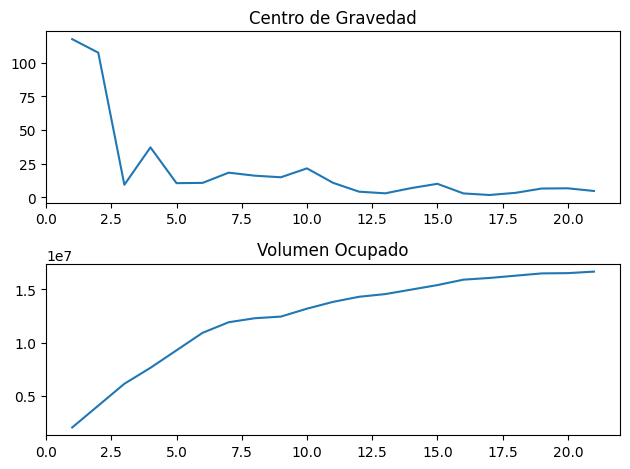

587 233 220
L * W * H = 30089620
total_volume = 16674625
TOTAL_VOLUME = 21
%DS = 0.9907434200169419
% = 0.5541653566911114


In [32]:
ALPHA_CS   = 4
BETA_LOSS  = 1
GAMMA_NB   = 0.2
DELTA_DS   = 0
P          = 0.04
EPSILON_GC = 0
ZETA_RS    = 0

params = ALPHA_CS, BETA_LOSS, GAMMA_NB, DELTA_DS, P, EPSILON_GC, ZETA_RS 

cont, execution_time,total_volume,TOTAL_VOLUME,DS,history_CG = MLCP_function(params=params,instance=1,weight_restriction=True, max_distance_cg=10000)
print("cont despues de ejecutar MLCP")
L = cont.l;W = cont.w; H = cont.h

box_dims = []
for aabb in cont.aabbs:
  box_dims.append([aabb.xmin,aabb.ymin,aabb.zmin,aabb.xmax,aabb.ymax,aabb.zmax])
box_dims.append([0,0,0,L,W,H])
bxplot.plot_container([L,W,H], box_dims) 

import matplotlib.pyplot as plt
import numpy as np


# Gráfico 1 - Centro de Gravedad
x_cg = list(range(1, len(history_CG) + 1))
plt.subplot(2, 1, 1)
plt.plot(x_cg, history_CG)
plt.title('Centro de Gravedad')

# Gráfico 2 - Volumen acumulado
acum_volume = np.cumsum(total_volume)
x_volume = list(range(1, len(total_volume) + 1))
plt.subplot(2, 1, 2)
plt.plot(x_volume, acum_volume)
plt.title('Volumen Ocupado')

plt.tight_layout()
plt.show()


print(f'{L} {W} {H}')
print(f'L * W * H = {L * W * H}')
print(f'total_volume = {sum(total_volume)}')
print(f'TOTAL_VOLUME = {len(TOTAL_VOLUME)}')
print(f'%DS = {DS /sum(total_volume)}')
print(f'% = {sum(total_volume)/(L * W * H)}')

# Plot the solution

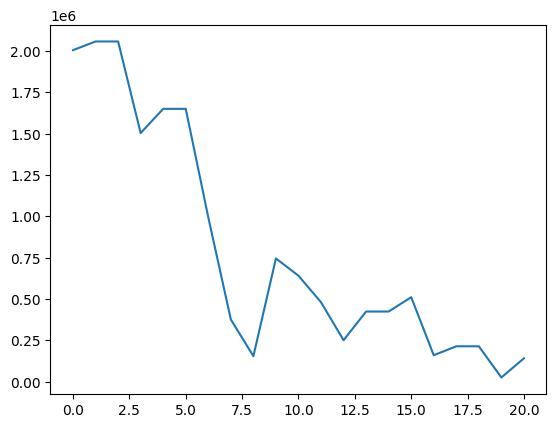

In [33]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(range(len(TOTAL_VOLUME)),TOTAL_VOLUME)

In [28]:
ALPHA = [0.0,1.0,2.0,3.0]
BETA = [0.0,1.0,2.0,3.0]
GAMMA = [0.0,0.1,0.2,0.3]
DELTA = [0.0,0.2,0.4,0.6]
P = [0.00,0.01,0.02,0.03]
INSTANCE = range(0,100)

In [29]:
#data = []
#for i in INSTANCE:
#    cont, execution_time,total_volume = MLCP_function(alpha=1,beta=0,gamma=0,delta=1,p=0,instance=i)
 #   data.append([i,execution_time,total_volume,center_of_gravity(cont),1,0,0,1,0])


In [30]:
df = pd.DataFrame(data,columns=['Instancia','Tiempo ejecucion','Volumen Ocupado','Diferencia centro','alpha','beta','gamma','delta','p'])

NameError: name 'data' is not defined

In [ ]:
df

In [ ]:
print(f'{df["Volumen Ocupado"].mean()}  {df["Diferencia centro"].mean()}')

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(df['Instancia'],df['Volumen Ocupado'])
plt.savefig('InstanciaVSVolumen.jpg')

In [ ]:
fig,ax = plt.subplots()
ax.plot(df['Instancia'],df['Diferencia centro'])
plt.savefig('InstanciaVSCentro.jpg')

In [ ]:
df.to_csv('resultados_parametros2.csv')

In [ ]:
# cont, execution_time,total_volume = MLCP_function(alpha=1,beta=0.0,gamma=0,delta=0,p=0,instance=2)
# cont, execution_time,total_volume = MLCP_function(alpha=1.0,beta=3.0,gamma=0.1,delta=0.2,p=0.02,instance=2)

L = cont.l;W = cont.w; H = cont.h

box_dims = []
for aabb in cont.aabbs:
  box_dims.append([aabb.xmin,aabb.ymin,aabb.zmin,aabb.xmax,aabb.ymax,aabb.zmax])

bxplot.plot_container([L,W,H], box_dims)


In [ ]:
#data = []
#for i in INSTANCE:
#    cont, execution_time,total_volume = MLCP_function(alpha=1.0,beta=3.0,gamma=0.1,delta=0.2,p=0.02,instance=i)
#    data.append([i,execution_time,total_volume,center_of_gravity(cont),1,0,0,1,0])

In [ ]:
df_2 = pd.DataFrame(data,columns=['Instancia','Tiempo ejecucion','Volumen Ocupado','Diferencia centro','alpha','beta','gamma','delta','p'])

In [ ]:
print(f'{df_2["Volumen Ocupado"].mean()}  {df_2["Diferencia centro"].mean()}')

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(df['Instancia'],df['Volumen Ocupado'],label='CS + R')
ax.plot(df_2['Instancia'],df_2['Volumen Ocupado'],label='VCS + R')
plt.title('Volumen ocupado por instancia')
plt.xlabel('Instancias')
plt.ylabel('Volumen ocupado')
fig.legend()
plt.savefig('InstanciaVSVolumen.jpg')

In [ ]:
fig,ax = plt.subplots()
ax.plot(df['Instancia'],df['Diferencia centro'],label='CS + R')
ax.plot(df_2['Instancia'],df_2['Diferencia centro'],label = 'VCS + R')
plt.xlabel('Instancias')
plt.ylabel('Distancia centro')
plt.title('Distancia centro por instancia')
fig.legend()
plt.savefig('InstanciaVSCentro.jpg')

In [ ]:
fig,ax = plt.subplots()
ax.plot(df['Instancia'],df['Tiempo ejecucion'],label='CS + R')
ax.plot(df_2['Instancia'],df_2['Tiempo ejecucion'],label = 'VCS + R')

plt.xlabel('Instancias')
plt.ylabel('Tiempo ejecución')
plt.title('Tiempo de ejecución por instancia')
fig.legend()
plt.savefig('InstanciaVSTiempo.jpg')

In [ ]:
matriz = [[0,1,2],[3,4,5],[6,7,8]]
print(matriz[-1])

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame with a datetime column
df = pd.DataFrame({'date': ['2023-01-01', '2023-01-02', np.nan, '2023-01-04']})
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if each value in the 'date' column is NaT
df['is_nat'] = df['date'].isna()

# Print the DataFrame
print(df)

In [ ]:
lista = [1,2,3]
sum(lista)

6